# 確率微分方程式のシミュレーション
幾何学ブラウン運動モデル

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

### パラメータ設定

numpy.cusum: https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html<br>

配列内の要素を足し合わせていったものを順次配列に記録するもので，<br>
dw(k)=w(k)-w(k-1)より，w(k) = w(k-1)+dw(k)より，ウィーナー過程w(k)を作成するのに用いる。<br>
次はcusumの使い方例である。

In [2]:
dw = np.arange(5)
w = np.cumsum(dw)
print(len(dw), len(w))
print(dw)
print(w)

5 5
[0 1 2 3 4]
[ 0  1  3  6 10]


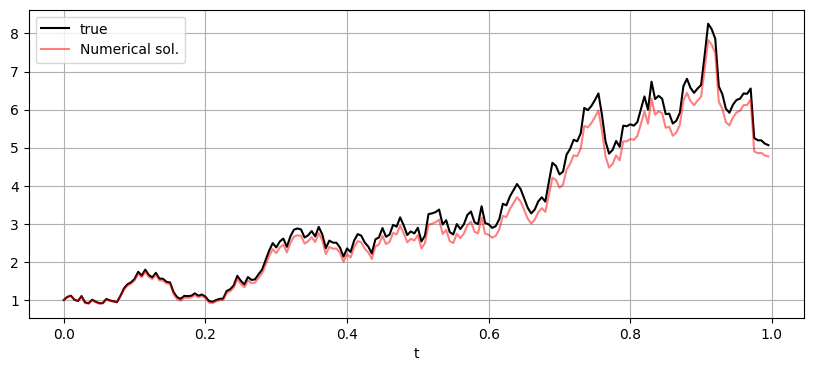

In [3]:
np.random.seed(123)

mu, sigma = 2, 1
x0 = 1
tend = 1.0
num = 200
dt = tend/num
#print(dt)

t = np.arange(0.0, tend, dt)
dw =  stats.norm.rvs(loc=0, scale=np.sqrt(dt), size=num) #scaleには標準偏差を与える
dw[0] = 0
w = np.cumsum(dw)# w(k)=w(k-1)+dw(k)
x_true = x0*np.exp( (mu - (sigma**2)/2.0 )*t + (sigma*w) )

x = x0
x_data = np.zeros(num) # strage for x
x_data[0] = x0
for k in range(1,num):
    x += mu*x*dt + sigma*x*dw[k]
    x_data[k] = x


fig = plt.figure(figsize=(10,4))
plt.plot(t, x_true, c='k', label='true')
plt.plot(t, x_data, c='r', label='Numerical sol.', alpha=0.5)
plt.xlabel('t')
plt.legend()
plt.grid()

#plt.savefig('fig_SM_StochasticDE.png', bbox_inches='tight')
plt.show()